In [1]:
import numpy as np
from skimage import filters, io
import cv2 as cv
from matplotlib import pyplot as plt
from scipy.ndimage import maximum_filter
from skimage.feature import corner_harris, corner_peaks

from myfunc.mysubplot import subplots

### Step1: Image gradients

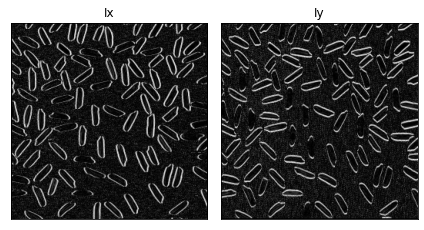

In [3]:
image = io.imread(fname="../../data/ass3/rice.png")
h,w = image.shape
# keep the output datatype to some higher forms
Ix = cv.Sobel(image,cv.CV_64F,1,0,ksize=1)
abs_Ix = np.absolute(Ix)
Ix_8u = np.uint8(abs_Ix)
Iy = cv.Sobel(image,cv.CV_64F,0,1,ksize=1)
abs_Iy = np.absolute(Iy)
Iy_8u = np.uint8(abs_Iy)

subplots([Ix_8u, Iy_8u], ['Ix', 'Iy'], 1,2)

### Step2: Second movement matrix M 

In [4]:
# Gaussian truncate window
kernel_size = 3
sigma = 0.5
Ixx = cv.GaussianBlur(Ix**2,(kernel_size,kernel_size), sigma)
Ixy = cv.GaussianBlur(Ix*Iy,(kernel_size,kernel_size), sigma)
Iyy = cv.GaussianBlur(Iy**2,(kernel_size,kernel_size), sigma)

offset = np.int8(kernel_size/2)
height, width = image.shape
corner_response = np.zeros((height, width))

# construct matrix elements
k = 0.02
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        A = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        C = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        B = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        det = (A * C) - (B**2)
        trace = A + C
        r = det - k*(trace**2)
        corner_response[y][x] = r

### Step3: Corner response calculation and Non-maximum suppression

In [7]:
# Response threshold 0.2*r_max 
r_max = np.max(corner_response)
r_threshold = corner_response > 0.2*r_max
# Non max suppression mask
NMS = (corner_response == maximum_filter(corner_response, 5))
mask = r_threshold & NMS
keypoints = np.argwhere(mask==True)

# compare with open source library
# keypoints = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)

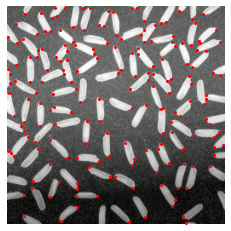

In [8]:
# plot and save
fig, ax = plt.subplots() 
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(keypoints[:, 1], keypoints[:, 0], color='red', marker='o',
        linestyle='None', markersize=2)
# ax.title.set_text('Harris keypoints with non max suppresion')
ax.set_axis_off()
plt.show()
# save image as the original
tmp_im = image.copy()
for point in keypoints:
    cv.circle(tmp_im, (point[1], point[0]), 1, (0, 0, 255), -1)
# cv.imwrite('./test1.png', tmp_im)

### archive

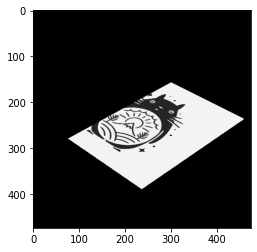

In [4]:
image1 = np.loadtxt('img_1.txt', delimiter=",").astype(np.uint8)
plt.imshow(image1, cmap='gray')
image2 = np.loadtxt('img_2.txt', delimiter=",").astype(np.uint8)
plt.imshow(image2, cmap='gray')

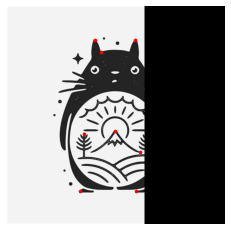

In [63]:
coords = corner_peaks(corner_harris(image1), min_distance=5, threshold_rel=0.5)
fig, ax = plt.subplots()
ax.imshow(image1, cmap=plt.cm.gray)
ax.plot([190, 204, 279, 167, 235, 288, 159, 281], [72, 98, 73, 277, 271, 317, 403, 403], color='red', marker='p',
        linestyle='None', markersize=3)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.set_axis_off()
plt.show()

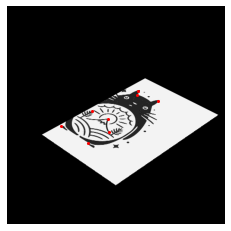

In [77]:
coords2 = corner_peaks(corner_harris(image2), min_distance=5, threshold_rel=0.4)
fig, ax = plt.subplots()
ax.imshow(image2, cmap=plt.cm.gray)
ax.plot([285,282, 328, 185, 219, 221, 117, 175], [184,193, 206, 228, 246, 273, 261, 298], color='red', marker='o',
        linestyle='None', markersize=2)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.set_axis_off()
plt.show()